# Loading the MNIST dataset in Keras

In [33]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images.shape

(10000, 28, 28)

In [34]:
train_images.shape

(60000, 28, 28)

# Let’s build the network

In [35]:
from keras import models
from keras import layers
from keras import regularizers
network = models.Sequential() 
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(28, 28)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

# The compilation step

In [36]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


# Normalize

In [37]:
#Listing 2.4	Preparing the image data
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255
print(test_images[0].shape)

(784,)


# Preparing the labels

In [38]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Model Fit

In [39]:
hist=network.fit(train_images, train_labels, epochs=49, batch_size=328,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/49
42000/42000 [==============================] - 3s 61us/step - loss: 0.9203 - accuracy: 0.8020 - val_loss: 0.5705 - val_accuracy: 0.8963
Epoch 2/49
42000/42000 [==============================] - 2s 58us/step - loss: 0.4954 - accuracy: 0.9064 - val_loss: 0.3564 - val_accuracy: 0.9436
Epoch 3/49
42000/42000 [==============================] - 2s 58us/step - loss: 0.3848 - accuracy: 0.9264 - val_loss: 0.2562 - val_accuracy: 0.9636
Epoch 4/49
42000/42000 [==============================] - 3s 64us/step - loss: 0.3214 - accuracy: 0.9362 - val_loss: 0.2497 - val_accuracy: 0.9575
Epoch 5/49
42000/42000 [==============================] - 2s 59us/step - loss: 0.2860 - accuracy: 0.9432 - val_loss: 0.2164 - val_accuracy: 0.9620
Epoch 6/49
42000/42000 [==============================] - 2s 58us/step - loss: 0.2626 - accuracy: 0.9454 - val_loss: 0.1989 - val_accuracy: 0.9657
Epoch 7/49
42000/42000 [==============================] - 2s 58us/st

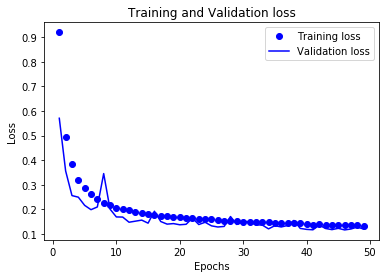

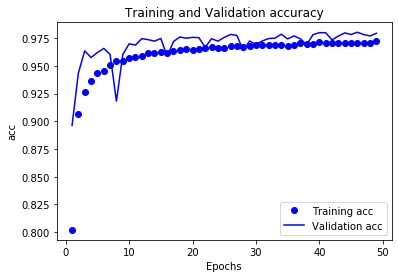

In [40]:
import matplotlib.pyplot as plt
loss_values=hist.history['loss']
val_loss_values=hist.history['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=hist.history['accuracy']
val_acc_values=hist.history['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [41]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [42]:
print('test_acc:', test_acc) 

test_acc: 0.9801999926567078


# Model Save

In [52]:
network.save("Mnist_dataset_DNN.h5")

# Prediction

In [73]:
s=test_images[80].reshape(1,28*28)
s.shape

(1, 784)

array([7], dtype=int64)

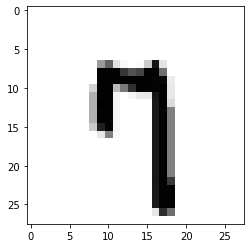

In [78]:
import matplotlib.pyplot as plt
plt.imshow(test_images[80].reshape(28,28),cmap='Greys')
#Greys and plt.cm.binary are same 
network.predict_classes(s)

In [79]:
network.predict_classes(test_images[90].reshape(1,28*28))

array([3], dtype=int64)

In [80]:

test_labels[90]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)